In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import numpy as np

from tmm_ml_models import ForwardTMMModel, ReverseTMMModel
data = pd.read_csv("R.csv")

2023-06-20 14:56:37.108562: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 14:56:39.725289: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:

labels = data.copy()

feature_headings = [
    "d1","d2","d3","d4","d5","d6","First Layer","Second Layer"
]

output_values = labels[feature_headings]
input_features = labels[[c for c in labels.columns if c not in feature_headings]]

input_train, input_test, output_train, output_test = train_test_split(input_features, output_values, test_size=0.2, random_state=42)

In [6]:
reverse_model = ReverseTMMModel(retrain=True, serialised_model_path="reverse_model.mdlsav")

# if not reverse_model.is_trained:
history = reverse_model.train(input_train, output_train, epochs=10)

Epoch 1/10
675/675 [==============================] - 14s 17ms/step - loss: 13.3497 - first_layer_loss: 2.9217 - second_layer_loss: 3.1721 - t1_loss: 725.5873 - first_layer_acc1: 0.1566 - second_layer_acc2: 0.1088 - t1_accuracy: 0.1651 - val_loss: 12.7312 - val_first_layer_loss: 2.6128 - val_second_layer_loss: 3.0494 - val_t1_loss: 706.8932 - val_first_layer_acc1: 0.2250 - val_second_layer_acc2: 0.1471 - val_t1_accuracy: 0.1292
Epoch 2/10
675/675 [==============================] - 11s 17ms/step - loss: 12.4067 - first_layer_loss: 2.4741 - second_layer_loss: 2.9536 - t1_loss: 697.9067 - first_layer_acc1: 0.2568 - second_layer_acc2: 0.1649 - t1_accuracy: 0.1794 - val_loss: 12.3047 - val_first_layer_loss: 2.4258 - val_second_layer_loss: 2.8787 - val_t1_loss: 700.0237 - val_first_layer_acc1: 0.2554 - val_second_layer_acc2: 0.1867 - val_t1_accuracy: 0.1854
Epoch 3/10
675/675 [==============================] - 9s 13ms/step - loss: 12.1439 - first_layer_loss: 2.3282 - second_layer_loss: 2.866

In [ ]:
reverse_model.save("reverse_model.mdlsav")

INFO:tensorflow:Assets written to: reverse_model.mdlsav/assets


INFO:tensorflow:Assets written to: reverse_model.mdlsav/assets


In [7]:
forward_model = ForwardTMMModel(serialised_model_path="forward_model.mdlsav")

if not forward_model.is_trained:
    forward_model.train(output_train, input_train)

In [ ]:
forward_model.save("forward_model.mdlsav")

2023-06-20 14:52:48.458012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_3' with dtype string and shape [?,2]
	 [[{{node input_3}}]]
2023-06-20 14:52:48.597577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'input_3' with dtype string and shape [?,2]
	 [[{{node input_3}}]]
2023-06-20 14:52:48.723241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs_1' with dtype string and shape [?,2]
	 [[{{node inputs_1}}]]
2023-06-20 

INFO:tensorflow:Assets written to: forward_model.mdlsav/assets


INFO:tensorflow:Assets written to: forward_model.mdlsav/assets


In [11]:
index = random.randint(0, len(input_test) - 1)
input_sample = input_test.iloc[[index]]

input_sample

,W400,W401,W402,W403,W404,W405,W406,W407,W408,W409,...,W741,W742,W743,W744,W745,W746,W747,W748,W749,W750
18337,0.938671,0.938598,0.938492,0.938352,0.938178,0.937968,0.937719,0.937429,0.937096,0.936722,...,0.818361,0.818712,0.819064,0.819415,0.819768,0.820122,0.820479,0.820837,0.821197,0.821559


In [12]:

output_sample = output_test.iloc[[index]]
mat_predict = reverse_model.predict(input_sample)
pred = mat_predict[["First Layer", "Second Layer"]]
act = output_sample[["First Layer", "Second Layer"]]


print(f"model predicted: {pred}")
print(f"actual combination: {act}")

mat_predict

1/1 [==============================] - 0s 31ms/step
model predicted:       First Layer Second Layer
18337        ZrO2           Mo
actual combination:       First Layer Second Layer
18337        ZrO2           Mn


,d1,d2,d3,d4,d5,d6,First Layer,Second Layer
18337,61.677967,39.381886,0.0,38.33123,34.808586,37.682503,ZrO2,Mo


In [13]:
reference_waveform = input_sample
predicted_waveform = forward_model.predict(mat_predict)

1/1 [==============================] - 0s 22ms/step


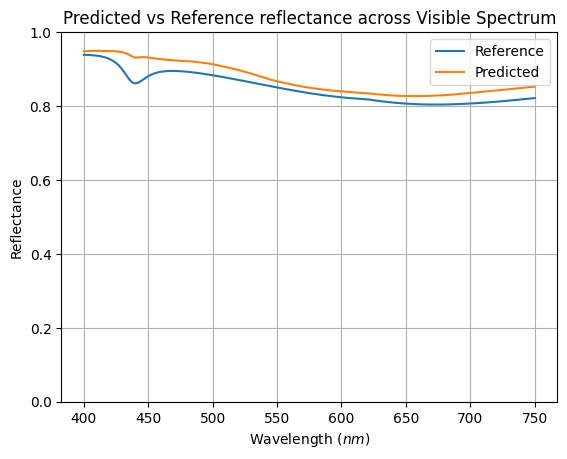

In [14]:
import matplotlib.pyplot as plt

x = np.arange(400,751)

plt.plot(x, reference_waveform.values.T, label="Reference")
plt.plot(x, predicted_waveform.values.T, label="Predicted")

plt.ylim((0,1))
plt.xlabel(r"Wavelength ($nm$)")
plt.ylabel("Reflectance")
plt.grid()
plt.title("Predicted vs Reference reflectance across Visible Spectrum")

plt.legend()